**Course:** SMM  
**Assignment:** 3

## Team Members
- **Muhammad Rehan** - 02-205252-012  
- **Arzoo Ghani Khan** - 02-205252-003

## Question 1

### Dataset
Raw dataset from: [Kaggle — datascientist97/university-students-marks-sheet](https://www.kaggle.com/datascientist97/university-students-marks-sheet)

### Github
Repo: [MuhammadRehanRasool/masters-smm-a3](https://github.com/MuhammadRehanRasool/masters-smm-a3)

In [50]:
# Load cleaned dataset
import pandas as pd

df = pd.read_csv('student_scores_clean.csv')

df.head()

,attendance,quizzes,assignment,final,gpa,midterm
0,87.34,93.33,86.67,73.33,3.28,91.11
1,82.04,46.67,30.00,60.00,2.31,66.67
2,89.29,86.67,90.00,77.33,3.16,75.56
3,72.84,36.67,33.33,58.67,1.77,26.67
4,73.56,53.33,30.00,46.67,2.17,75.56


In [51]:
df.describe()

,attendance,quizzes,assignment,final,gpa,midterm
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,77.100893,53.471786,51.667143,50.485357,2.218393,65.680446
std,6.246707,24.219538,24.239325,27.334167,0.656790,21.364627
min,58.470000,0.000000,0.000000,0.000000,0.640000,24.440000
25%,73.277500,33.330000,30.000000,30.335000,1.727500,51.110000
50%,76.580000,51.665000,50.835000,50.490000,2.220000,66.670000
75%,81.125000,70.832500,66.670000,72.332500,2.755000,77.780000
max,92.510000,100.000000,100.000000,100.000000,3.530000,100.000000


In [52]:
df['assignment'].max()

np.float64(100.0)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   attendance  224 non-null    float64
 1   quizzes     224 non-null    float64
 2   assignment  224 non-null    float64
 3   final       224 non-null    float64
 4   gpa         224 non-null    float64
 5   midterm     224 non-null    float64
dtypes: float64(6)
memory usage: 10.6 KB


In [54]:
import matplotlib.pyplot as plt
import numpy as np

## Task 1: What is the average performance of students in hybrid learning?

In [55]:
# Average of individual scores
print("Average Total Quiz Score (%):", (df["quizzes"].mean()).round(2))
print("Average Total Assigment Score (%):", (df["assignment"].mean()).round(2))
print("Average Final Score (%):", (df["final"].mean()).round(2))
print("Average GPA (0-4):", (df["gpa"].mean()).round(2))

totalmarks = (df["gpa"] / 4) * 150
print("Average Total Marks (%):", ((totalmarks.mean() / 150) * 100).round(2))

Average Total Quiz Score (%): 53.47
Average Total Assigment Score (%): 51.67
Average Final Score (%): 50.49
Average GPA (0-4): 2.22
Average Total Marks (%): 55.46


___________

## Task 2: Are the grades normally distributed?

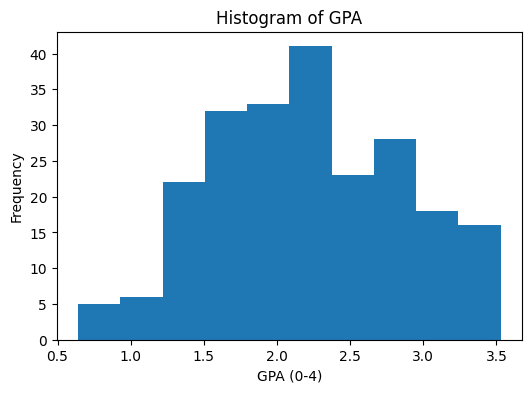

In [56]:
# Display historgram for GPA

plt.figure(figsize=(6,4))
plt.hist(df['gpa'])
plt.title(f"Histogram of GPA")
plt.xlabel("GPA (0-4)")
plt.ylabel("Frequency")
plt.show()

Answer: Yes, the GPA is normally distributed as shown in the histogram above.

--------------

## Task 3: Which component (quizzes, assignments, or exams) shows the most variability?

In [57]:
# Standard deviation of individual columns
print("Standard Deviation of Scores:")
df[["quizzes","assignment","final"]].std()

Standard Deviation of Scores:


quizzes       24.219538
assignment    24.239325
final         27.334167
dtype: float64

In [58]:
# Variance of individual columns
print("Variance of Scores:")
df[["quizzes","assignment","final"]].var()

Variance of Scores:


quizzes       586.586006
assignment    587.544899
final         747.156688
dtype: float64

C:\Users\muham\AppData\Local\Temp\ipykernel_18624\1109605332.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df["quizzes"], df["assignment"], df["final"]], labels=["quizzes", "assignment", "final"])


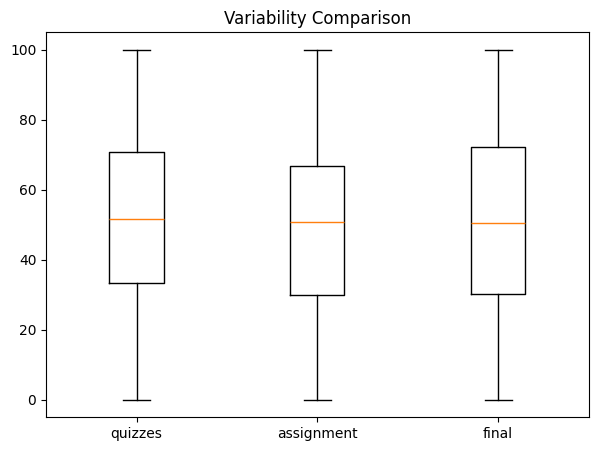

In [59]:
plt.figure(figsize=(7,5))
plt.boxplot([df["quizzes"], df["assignment"], df["final"]], labels=["quizzes", "assignment", "final"])
plt.title("Variability Comparison")
plt.show()

Answer: The final exam shows the most variability among quizzes, assignments, and final exams as indicated by the boxplot above.

----------------

## Task 4: Are there any outliers in GPA scores?

In [60]:
# Replace random outlier in GPA for testing
df.loc[5, 'gpa'] = 10.0  # Uncomment to test outlier detection
df.loc[13, 'gpa'] = 0.0  # Uncomment to test outlier detection
df.loc[20, 'gpa'] = 6.0  # Uncomment to test outlier detection

In [61]:
df['gpa'].max()

np.float64(10.0)

In [62]:
# GPA outlier detection using IQR method

q1 = df["gpa"].quantile(0.25)
q3 = df["gpa"].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df["gpa"] < lower) | (df["gpa"] > upper)]
print("GPA Outliers Count:", len(outliers))
print(outliers.head())

GPA Outliers Count: 3
    attendance  quizzes  assignment  final   gpa  midterm
5        78.09    90.00       23.33  60.00  10.0    73.33
13       70.07    23.33       30.00  74.67   0.0    24.44
20       74.55    66.67       16.67   2.67   6.0   100.00


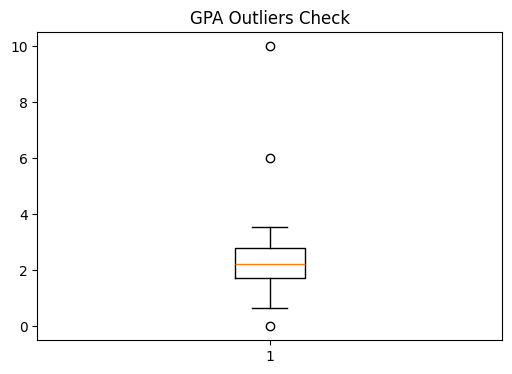

In [63]:
# Using BoxPlot

plt.figure(figsize=(6,4))
plt.boxplot(df["gpa"])
plt.title("GPA Outliers Check")
plt.show()

Answer: Dataset contains no outlier in GPA but after applying simulation technique, we found some outliers in GPA scores as shown in the histogram above.

_______________________

In [64]:
print("Average Scores:")
print(df[["attendance", "quizzes", "assignment", "final", "gpa"]].mean())

# Simple interpretation logic
avg_gpa = df["gpa"].mean()


Average Scores:
attendance    77.100893
quizzes       53.471786
assignment    51.667143
final         50.485357
gpa            2.262500
dtype: float64


Recommendation: Hybrid learning may be affecting performance negatively.